# Análise exploratória - Catálogo Netflix
___

## Introdução

Nesta análise exploratória, investigamos o catálogo da Netflix (2008 - 2021), uma das principais plataformas de streaming do mundo, para entender melhor a distribuição e as características dos conteúdos disponíveis. Através de diversas visualizações, exploramos aspectos como a predominância de filmes ou séries, a diversidade de gêneros, a distribuição de conteúdo por países, e as tendências ao longo dos anos. A análise também examina a duração média dos filmes e séries, as classificações etárias mais comuns, e a forma como esses fatores podem refletir as preferências do público e as estratégias de produção da plataforma. Este estudo fornece uma visão abrangente do que compõe o vasto catálogo da Netflix, destacando padrões e insights que podem ser valiosos para profissionais da indústria e entusiastas do entretenimento.

## Objetivo

O principal objetivo deste projeto é promover o aprendizado e saciar a curiosidade.

<br><br>
![imagem](https://logodownload.org/wp-content/uploads/2014/10/netflix-logo-2-1.png)

<br><br>

## Table of Contents


1. [Configurações](#config)
2. [Distribuição por conteúdo](#cont)
3. [Distribuição mês a mês](#mom)
4. [Países](#pais)
5. [Diretores](#dir)
6. [Classificação indicativa](#class)
7. [Durações](#temp)
7. [Conclusão](#conc)


<br><br>
<div id='config'/>  

## 1. Configurações
___

### 1.1. Importando bibliotecas

In [825]:
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import pycountry
import squarify
import matplotlib.colors as mcolors
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

warnings.filterwarnings('ignore')
%matplotlib inline

### 1.2. Definindo os caminhos

In [3]:
dir_atual = os.path.dirname(os.path.abspath('__file__'))
root_dir = os.path.abspath(os.path.join(dir_atual, '..'))
input_path = os.path.join(dir_atual, 'input')
formas_paises_url = 'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json'

### 1.3. Lendo o arquivo

In [823]:
df = pd.read_csv(os.path.join(input_path, 'netflix_titles.csv'))

### 1.3. Limpando o arquivo
Vamos limpar os dados onde há valores nulos.

In [824]:
df['country'] = df['country'].fillna('No Data')
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

df.dropna(inplace=True)
df.drop_duplicates(inplace= True)

df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 1.4. Ajustando a data
Criremos algumas colunas a partir da coluna de data adicionada para faciliar a análise futura.

In [826]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


### 1.5. Cores

As cores foram obtidas do próprio [Brand Assets](https://brand.netflix.com/en/assets/logos) da Netflix.

In [827]:
net_dark = '#101010'
net_red = '#B92028'
net_dark_red = '#B20710'
net_light = '#F5F5F1'

### 1.6. Auxiliares
Funções ou variáveis auxiliares que usaremos durante a análise.

In [467]:
faixa_etaria = {
    'TV-PG': 'Pré-adolescentes',
    'TV-MA': 'Adultos',
    'TV-Y7-FV': 'Pré-adolescentes',
    'TV-Y7': 'Pré-adolescentes',
    'TV-14': 'Adolescentes',
    'R': 'Adultos',
    'TV-Y': 'Crianças',
    'NR': 'Adultos',
    'PG-13': 'Adolescentes',
    'TV-G': 'Crianças',
    'PG': 'Pré-adolescentes',
    'G': 'Crianças',
    'UR': 'Adultos',
    'NC-17': 'Adultos'
}

country_mapping = {
    "South Korea": "Korea, Republic of",
    "Russia": "Russian Federation",
    "Taiwan": "Taiwan, Province of China",
    "Czech Republic": "Czechia",
    "Soviet Union": "USSR",  # Não existe código atual
    "West Germany": "Germany",  # Não existe código atual
    "Venezuela": "Venezuela, Bolivarian Republic of",
    "Turkey": "Türkiye",
    "Vietnam": "Viet Nam",
    "Syria": "Syrian Arab Republic",
    "Iran": "Iran, Islamic Republic of"
}

def alpha3code(column):
    CODE = []
    for country in column:
        if country in country_mapping:
            mapped_country = country_mapping[country]
        else:
            mapped_country = country
        
        if mapped_country:
            try:
                code = pycountry.countries.get(name=mapped_country).alpha_3
                CODE.append(code)
            except AttributeError:
                CODE.append('None')
        else:
            CODE.append('None')
    
    return CODE

<br><br>
<div id='cont'/>  

## 2. Distribuição por conteúdo
___

O objetivo aqui é entendermos a distribuição de conteúdo entre os dois tipo que são: Filmes e Séries.

Text(0.215, 0.2, 'Séries')

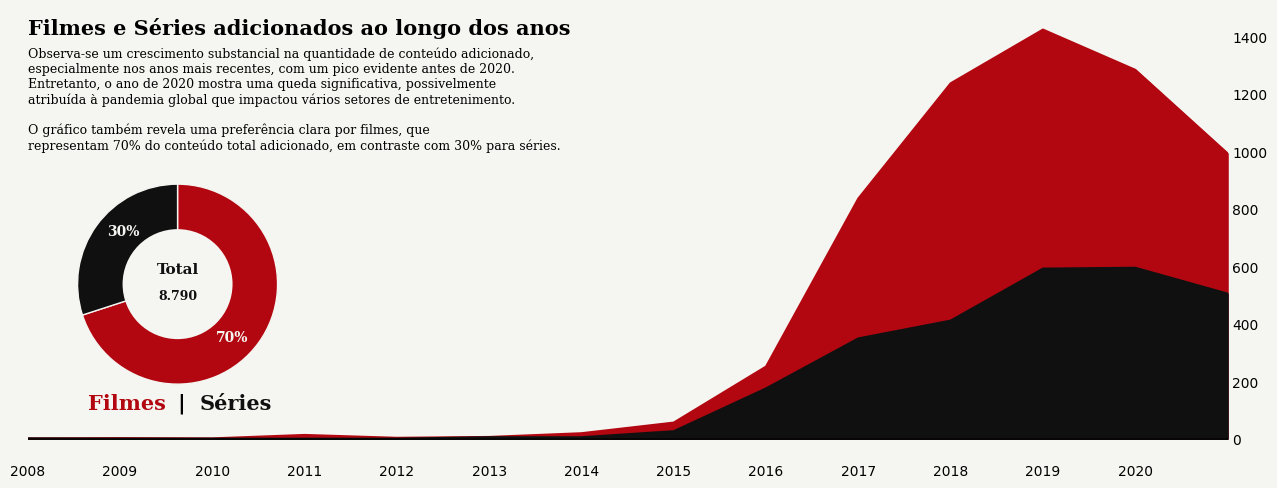

In [9]:
# Distribuição por tipo

content_group = df.groupby(['type'])['type'].count()

total = int(content_group.sum())    # Total de ocorrências
ratio = (content_group/total).round(2)  # Razão entre tipo e total de ocorrências
perc = pd.DataFrame(ratio).T    # Altera linhas para colunas

labels = ['Movies', 'TV Shows'] # Rótulos
sizes = [perc['Movie'][0], perc['TV Show'][0]] # Tamanhos
colors = [net_dark_red, net_dark]   # Cores

fig = plt.figure(figsize=(15, 5), facecolor=net_light)

ax = [None for _ in range(6)]

ax[0] = fig.add_axes([0.1,0.1,0.8,0.9], facecolor=net_light) # x, y, dx, dy
ax[1] = fig.add_axes([0.05,0.20,0.3,0.5], facecolor=net_light)

wedges, texts = ax[1].pie(
    sizes, labels=labels, colors=colors, startangle=90, counterclock=False,
    autopct=None, pctdistance=0.85, wedgeprops={'edgecolor': net_light}
    )

# Criando o "buraco" no meio para formar o donut
centre_circle = plt.Circle((0, 0), 0.55, fc=net_light)
fig.gca().add_artist(centre_circle)

for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2  # Calcula o ângulo médio do setor
    x = 0.67 * np.cos(np.radians(angle))  # Converter para coordenada x
    y = 0.9 * np.sin(np.radians(angle))  # Converter para coordenada y

    ax[1].annotate(
        f'{int(sizes[i] * 100)}%',
        xy=(x, y),
        ha='center', va='center', 
        fontsize=10, fontfamily='serif', fontweight='bold', color=net_light
    )

for text in texts:
    text.set_text('')

ax[1].annotate(
    text='Total',
    xy=(0,0.15),
    ha='center', va='center', 
    fontsize=11, fontfamily='serif', fontweight='bold', color=net_dark
)

ax[1].annotate(
    text=f'{total:,.0f}'.replace(",","."),
    xy=(0,-.11),
    ha='center', va='center', 
    fontsize=9, fontfamily='serif', fontweight='bold', color=net_dark
)

# -------------------------------------------------------------------------
# Distribuição temporal

content_group_temp = df.groupby(['year_added', 'type'])['year_added'].count().unstack().reset_index().fillna(0)

ax[0].plot(content_group_temp['year_added'], content_group_temp['Movie'], color=net_dark_red)
ax[0].plot(content_group_temp['year_added'], content_group_temp['TV Show'], color=net_dark)

ax[0].fill_between(content_group_temp['year_added'], 0,content_group_temp['Movie'], color=net_dark_red, alpha=1)
ax[0].fill_between(content_group_temp['year_added'], 0,content_group_temp['TV Show'], color=net_dark, alpha=1)

ax[0].grid(False)
ax[0].set_xlim(2008,2021)
ax[0].set_xticks(np.arange(2008, 2021, 1))
ax[0].yaxis.tick_right()
ax[0].tick_params(axis='both', which='both',length=0)
ax[0].axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax[0].spines[s].set_visible(False)

fig.text(0.1,0.95, s='Filmes e Séries adicionados ao longo dos anos', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(
    0.1,0.69, 
    s='''
Observa-se um crescimento substancial na quantidade de conteúdo adicionado,
especialmente nos anos mais recentes, com um pico evidente antes de 2020.
Entretanto, o ano de 2020 mostra uma queda significativa, possivelmente
atribuída à pandemia global que impactou vários setores de entretenimento.

O gráfico também revela uma preferência clara por filmes, que 
representam 70% do conteúdo total adicionado, em contraste com 30% para séries.
    ''',
      fontsize=9, fontweight='light', fontfamily='serif')

fig.text(0.14,0.2, s='Filmes', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark_red)
fig.text(0.2,0.2, s='|', fontsize=15, fontweight='bold', fontfamily='serif', color='black')
fig.text(0.215,0.2, s='Séries', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark)


<br><br>
<div id='mom'/>  

## 3. Distribuição Mês a Mês
___
Analisando a adição de conteúdo durante o ano.

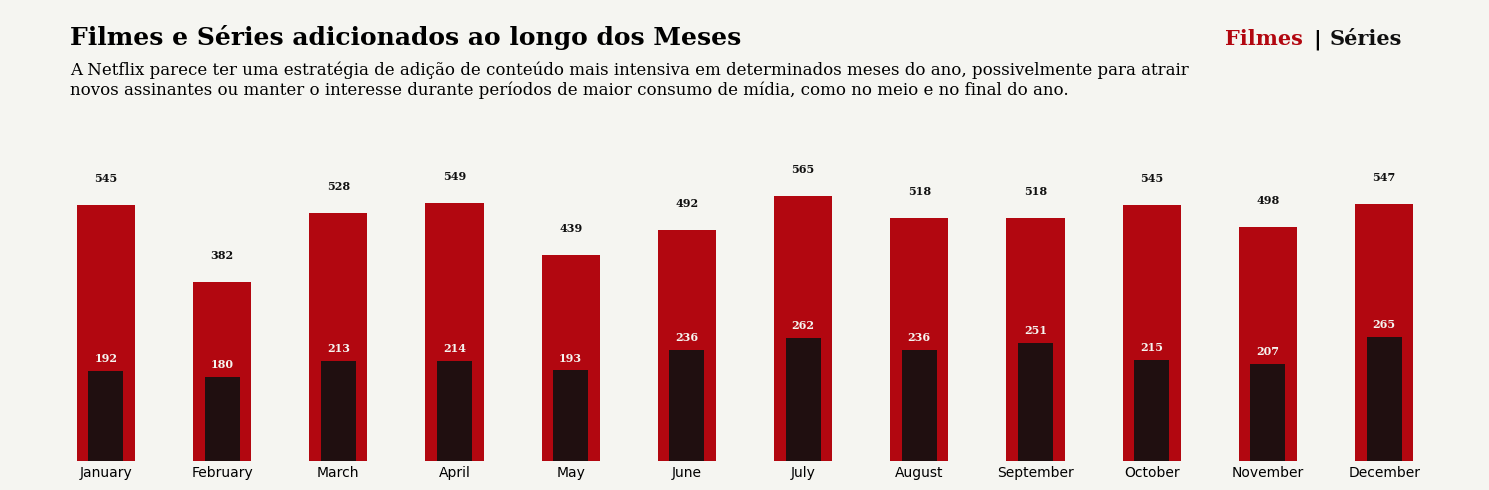

In [845]:
content_group_mes = df.groupby(['month_name_added', 'type'])['month_name_added'].count().unstack().reset_index().fillna(0)

# Ordenando de acordo com o calendário
ordem_meses = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

content_group_mes['month_name_added'] = pd.Categorical(
    content_group_mes['month_name_added'], 
    categories=ordem_meses, 
    ordered=True
)

content_group_mes = content_group_mes.sort_values('month_name_added').reset_index(drop=True)

content_group_mes['Total'] = content_group_mes['Movie'] + content_group_mes['TV Show']

v_max_filme = int(content_group_mes['Movie'].max())
v_max_serie = int(content_group_mes['TV Show'].max())

color_map_filme = ['#B8B8B8' if count != v_max_filme else net_dark_red for count in content_group_mes['Movie']]
color_map_serie = ['#777777' if count != v_max_serie else net_dark for count in content_group_mes['TV Show']]

fig, ax = plt.subplots(1,1, figsize=(15,5), facecolor=net_light)
ax.set_facecolor(net_light)

ax.bar(content_group_mes['month_name_added'], content_group_mes['Movie'], color=net_dark_red, width=0.5)
ax.bar(content_group_mes['month_name_added'], content_group_mes['TV Show'], color=net_dark, width=0.3, alpha=0.9)

ax.grid(False)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.set_yticklabels([])
ax.tick_params(axis='both', which='both',length=0)

ax.set_ylim(0, max(v_max_filme, v_max_serie) * 1.7)

for i in content_group_mes.index:
    ax.annotate(f"{content_group_mes.at[i, 'Movie']}", 
                xy=(i, content_group_mes.at[i, 'Movie'] +  v_max_filme*0.1),
                va='center', ha='center', fontweight='bold', fontfamily='serif', fontsize=8, color=net_dark)
    
    ax.annotate(f"{content_group_mes.at[i, 'TV Show']}", 
                xy=(i, content_group_mes.at[i, 'TV Show'] +  v_max_serie*0.1),
                va='center', ha='center', fontweight='bold', fontfamily='serif', fontsize=8, color=net_light)

fig.text(0.05,0.9, s='Filmes e Séries adicionados ao longo dos Meses',
        fontsize=18, fontweight='bold', fontfamily='serif')
fig.text(
    0.05, 0.76, 
    s='''
A Netflix parece ter uma estratégia de adição de conteúdo mais intensiva em determinados meses do ano, possivelmente para atrair
novos assinantes ou manter o interesse durante períodos de maior consumo de mídia, como no meio e no final do ano.
    ''',
    fontsize=12, fontweight='light', fontfamily='serif'
)

fig.text(0.82,0.9, s='Filmes', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark_red)
fig.text(0.879,0.9, s='|', fontsize=15, fontweight='bold', fontfamily='serif', color='black')
fig.text(0.89,0.9, s='Séries', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark)

plt.tight_layout()

<br><br>
<div id='pais'/>  

## 4. Países
---
Vamos analisar os países produtores de conteúdo.
A coluna de Páis, em alguns casos, possui mais de um país registrado, vamos considerar apenas o primeiro país para a análise.

### 4.1. Criando coluna do Primeiro País

In [38]:
paises = df[df['country'] != 'No Data']

paises['primeiro_pais'] = paises['country'].apply(lambda x: x.split(",")[0])

paises['cod_pais'] = alpha3code(paises['primeiro_pais'])

### 4.2. Distribuição de conteúdo por país
Aqui iremos capturar o 10 maiores países em questão de produção de conteúdo adicionados ao catálogo.

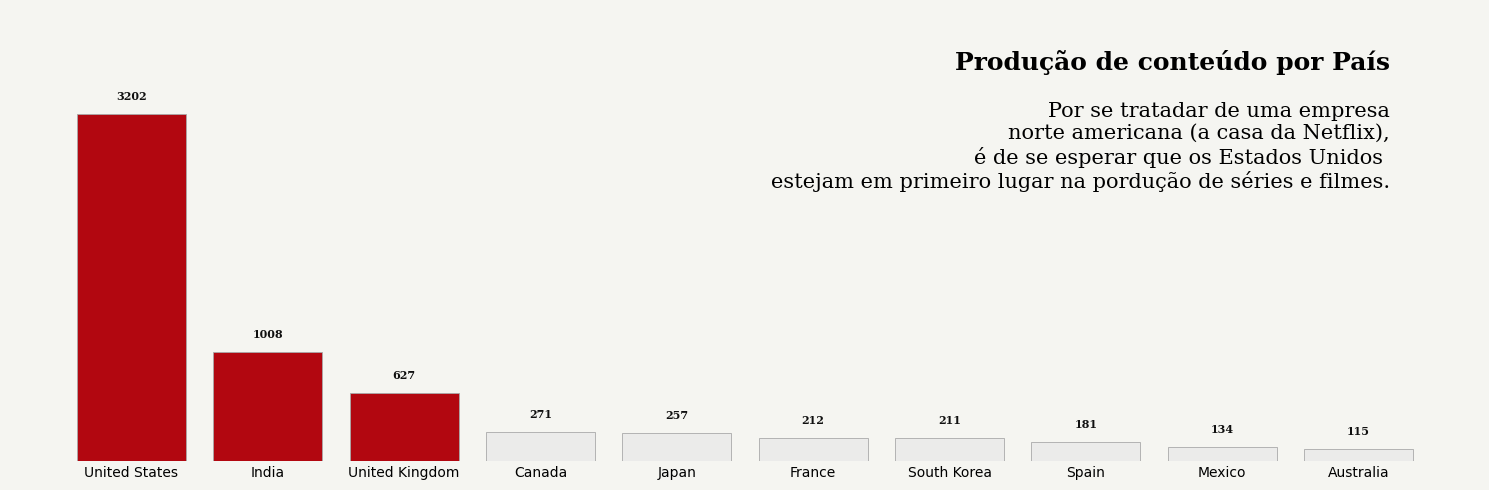

In [868]:
top_10_paises = paises.groupby(['primeiro_pais'])['primeiro_pais'].count().sort_values(ascending=False)[:10]

color_map = ['#EBEBEA' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = net_dark_red

fig, ax = plt.subplots(1,1, figsize=(15,5), facecolor=net_light)
ax.set_facecolor(net_light)

ax.bar(x=top_10_paises.index, height=top_10_paises.values, color=color_map, edgecolor='darkgray',linewidth=0.6)

ax.grid(False)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.set_yticklabels([])
ax.tick_params(axis='both', which='both',length=0)

ax.set_ylim(0,  int(top_10_paises.values[0])* 1.3)

for i, pais in enumerate(top_10_paises.index):
    ax.annotate(
        text=f'{int(top_10_paises.values[i])}',
        xy=(i, top_10_paises.values[i] + int(top_10_paises.values[0])* 0.05),
        va='center', ha='center', fontweight='bold', fontfamily='serif', fontsize=8, color=net_dark
    )


fig.text(0.93,0.85, s='Produção de conteúdo por País', fontsize=18, fontweight='bold', fontfamily='serif', ha='right')
fig.text(
    0.93,0.57,
    s='''
Por se tratadar de uma empresa
norte americana (a casa da Netflix),
é de se esperar que os Estados Unidos 
estejam em primeiro lugar na pordução de séries e filmes.
''',
    fontsize=15, fontweight='light', fontfamily='serif', ha='right')

plt.tight_layout()

### 4.3. Tipo de conteúdo por País

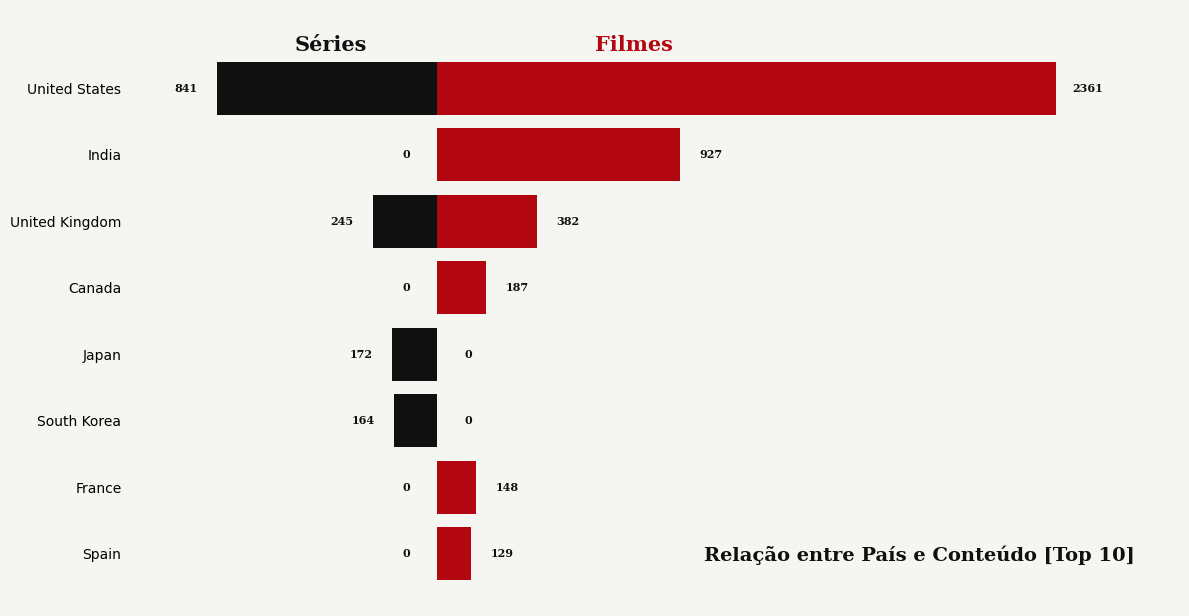

In [879]:
top_10_paises = paises.groupby(['primeiro_pais', 'type'])['primeiro_pais'].count().sort_values(ascending=False)[:10]
top_10_paises = top_10_paises.unstack().reset_index().fillna(0)

top_10_paises['total'] = top_10_paises['Movie'] + top_10_paises['TV Show'].fillna(0)
top_10_paises = top_10_paises.sort_values(by='total', ascending=True).reset_index(drop=True)

x_min = int(top_10_paises['TV Show'].max())
x_max = int(top_10_paises['Movie'].max())

fig, ax = plt.subplots(1,1, figsize=(12,6), facecolor=net_light)
ax.set_facecolor(net_light)
y_pos = np.arange(len(top_10_paises['primeiro_pais']))
ax.barh(y_pos, top_10_paises['Movie'], align='center', color=net_dark_red, label='Movies')
ax.barh(y_pos, -top_10_paises['TV Show'], align='center', color=net_dark, label='TV Shows')

ax.set_yticks(y_pos)
ax.set_yticklabels(top_10_paises['primeiro_pais'])
ax.set_xlim(-(x_min*1.4), x_max*1.2)

ax.grid(False)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.tick_params(axis='both', which='both',length=0)
ax.set_xticklabels([])
ax.tick_params(axis='y', pad=5) 
ax.tick_params(axis='x', pad=5) 

for i, pais in enumerate(top_10_paises['primeiro_pais']):
    ax.annotate(
        text=f'{int(top_10_paises['Movie'][i])}',
        xy=(int(top_10_paises['Movie'][i])+x_max*0.05, i),
        va='center', ha='center', fontweight='bold', fontfamily='serif', fontsize=8, color=net_dark
    )

    ax.annotate(
        text=f'{int(top_10_paises['TV Show'][i])}',
        xy=((-int(top_10_paises['TV Show'][i])-x_max*0.05, i)),
        va='center', ha='center', fontweight='bold', fontfamily='serif', fontsize=8, color=net_dark
    )


fig.text(0.25,0.95,s='Séries', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark)
fig.text(0.5,0.95,s='Filmes', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark_red)
fig.text(0.4,1,s=' ')
fig.text(0.95, 0.1, 'Relação entre País e Conteúdo [Top 10]',
        ha='right', fontsize=14, fontweight='bold', fontfamily='serif', color=net_dark
    )

plt.tight_layout()

### 4.4. Categorias por País

Na coluna de categorias, assim como a de país, podemos ter mais de um valor listado, por isso vamos considerar apenas o primeiro para a análise.

In [131]:
paises['primeira_categoria'] = paises['listed_in'].apply(lambda x: x.split(",")[0])

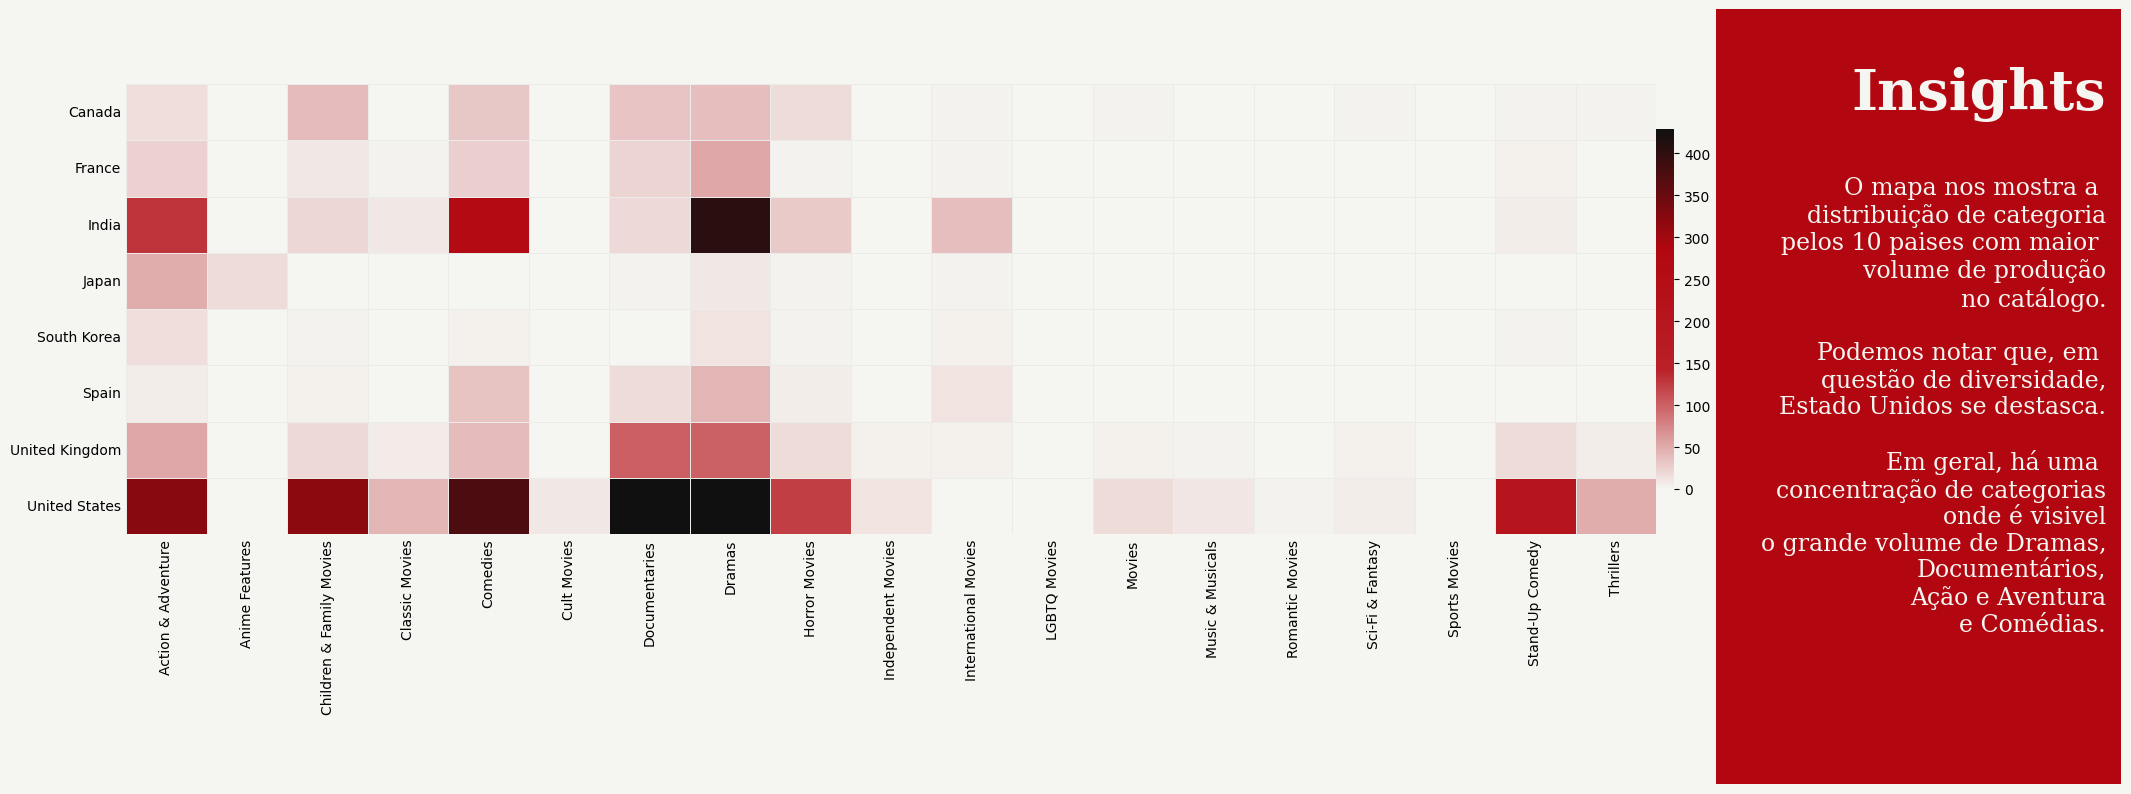

In [822]:
fig = plt.figure(figsize=(15, 5), facecolor=net_light)

ax = [None for _ in range(6)]

ax[0] = fig.add_axes([0.1,0.0,1.2,0.9], facecolor=net_light) # x, y, dx, dy
ax[1] = fig.add_axes([1.16,-0.5,0.27,1.55], facecolor=net_dark_red)

top_10_paises_cat = paises.groupby(['primeiro_pais', 'primeira_categoria']).size().reset_index(name='count')
top_10_paises_cat = top_10_paises_cat.sort_values(by='count', ascending=False)
top_10_paises_cat = top_10_paises_cat[top_10_paises_cat['primeiro_pais'].isin(top_10_paises['primeiro_pais'].tolist())]

# Reorganizar os dados para o formato de heatmap
heatmap_data = top_10_paises_cat.pivot(index="primeiro_pais", columns="primeira_categoria", values="count").fillna(0)
cores = [net_light, net_red, net_dark_red, net_dark]
cmap = LinearSegmentedColormap.from_list("custom_cmap", cores)

sns.heatmap(
    heatmap_data, cmap=cmap, annot=False, linewidths=.5, linecolor='#EBEBEA', ax=ax[0], 
    cbar=True, cbar_kws={"shrink": 0.8, "orientation": "vertical", "pad": 0.0}
)

for i in range(2):
    ax[i].grid(False)
    ax[i].tick_params(axis='both', which='both',length=0)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    for s in ['top', 'right','bottom','left']:
        ax[i].spines[s].set_visible(False)

ax[1].yaxis.set_tick_params(pad=2)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

fig.text(
  x=1.42, y = 0.85,
  s= 'Insights',
  ha='right',
  fontsize=40,
  color=net_light,
  fontfamily='serif',
  fontweight='bold'
)

fig.text(
  x=1.42, y = -0.3,
  s= '''
O mapa nos mostra a 
distribuição de categorias
pelos 10 países com maior 
volume de produção
no catálogo.

Podemos notar que, em 
questão de diversidade,
Estados Unidos se destaca.

Em geral, há uma 
concentração de categorias
onde é visível
o grande volume de Dramas,
Documentários,
Ação e aventura
e Comédias.

''',
  ha='right',
  fontsize=17,
  color=net_light,
  fontfamily='serif',
  fontweight='light'
)

plt.tight_layout()

<br><br>
<div id='dir'/>  

## 5. Diretores
---

Aqui vamos analisar o conteúdo adicionado em relação ao diretores de cada filme ou série.
Também iremos pegar apenas o primeiro diretor no caso onde há mais de um associado.

In [295]:
diretores = df[df['director'] != 'No Data']
diretores['diretor_primeiro'] = diretores['director'].apply(lambda x: x.split(',')[0])

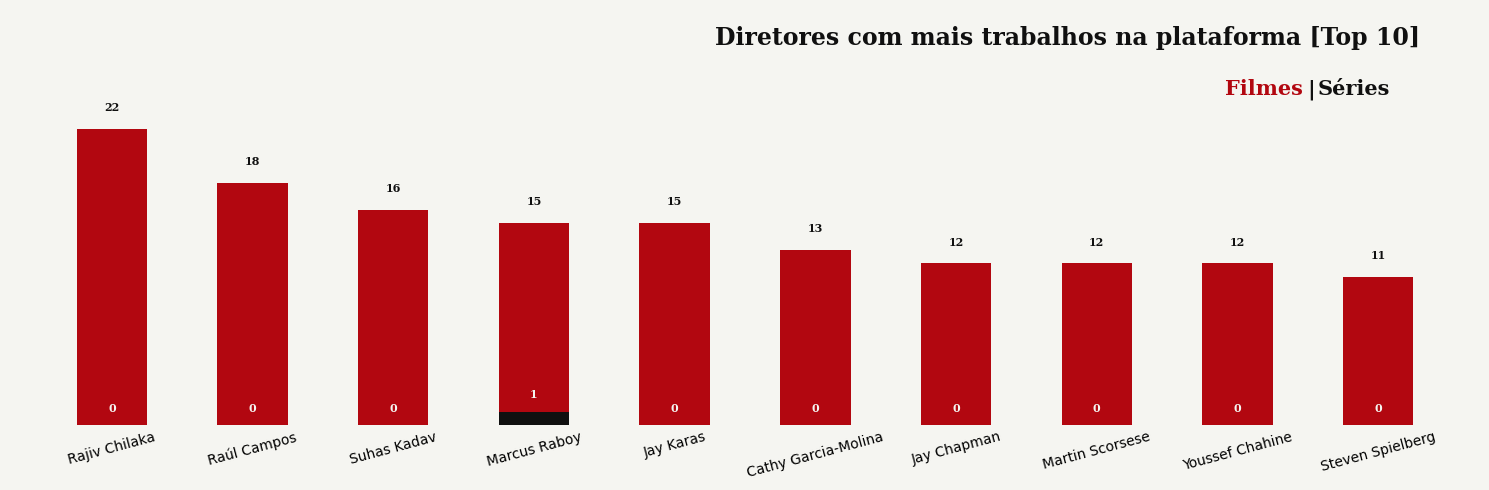

In [856]:
diretores_cont = diretores.groupby(['diretor_primeiro', 'type'])['diretor_primeiro'].count().unstack().fillna(0)

diretores_cont['Movie'] = diretores_cont['Movie'].astype(int)
diretores_cont['TV Show'] = diretores_cont['TV Show'].astype(int)

diretores_cont['total'] = diretores_cont['Movie']  + diretores_cont['TV Show']
diretores_cont['m_perc'] = (diretores_cont['Movie'] / diretores_cont['total']).round(2) * 100
diretores_cont['s_perc'] = (diretores_cont['TV Show'] / diretores_cont['total']).round(2) * 100

diretores_cont = diretores_cont.reset_index().sort_values(by='total', ascending=False)[:10]

fig, ax = plt.subplots(1, 1, figsize = (15,5), facecolor=net_light)
ax.set_facecolor(net_light)

ax.bar(x=diretores_cont['diretor_primeiro'], height=diretores_cont['Movie'], width=0.5, color=net_dark_red)
ax.bar(x=diretores_cont['diretor_primeiro'], height=diretores_cont['TV Show'], width=0.5, color=net_dark)

ax.set_yticklabels([])
ax.set_xticklabels(labels=diretores_cont['diretor_primeiro'], rotation=15)
ax.grid(False)
ax.tick_params(axis='both', which='both',length=0)
ax.set_ylim(0, max(diretores_cont['Movie'].max(), diretores_cont['TV Show'].max()) * 1.4)
for s in ['left', 'right', 'top', 'bottom']:
    ax.spines[s].set_visible(False)

for i, _ in enumerate(diretores_cont['diretor_primeiro']):
    v_filme = diretores_cont.iloc[i]['Movie']
    v_serie = diretores_cont.iloc[i]['TV Show']

    ax.annotate(
        text=v_filme,
        xy=(_, v_filme + diretores_cont['Movie'].max()*0.06),
        ha='center',
        color=net_dark,
        fontweight='bold', fontfamily='serif', fontsize=8
    )

    ax.annotate(
        text=v_serie,
        xy=(_, v_serie + diretores_cont['TV Show'].max()),
        ha='center',
        color=net_light,
        fontweight='bold', fontfamily='serif', fontsize=8
    )

fig.text(0.95, 0.9, 'Diretores com mais trabalhos na plataforma [Top 10]',
        ha='right', fontsize=17, fontweight='bold', fontfamily='serif', color=net_dark
    )

fig.text(0.82,0.8,s='Filmes', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark_red)
fig.text(0.875,0.8,s='|', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark)
fig.text(0.882,0.8,s='Séries', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark)

plt.tight_layout()

<br><br>
<div id='class'/>

## 6. Classificação indicativa
---

Vamos ver agora qual a distribuição do catálogo em relação à classificação indicativa.
Em seguida faremos uma distribuição dessas classificações em faixa etária.

In [816]:
class_ind = df.groupby(['rating', 'type'])['rating'].count().unstack().fillna(0)

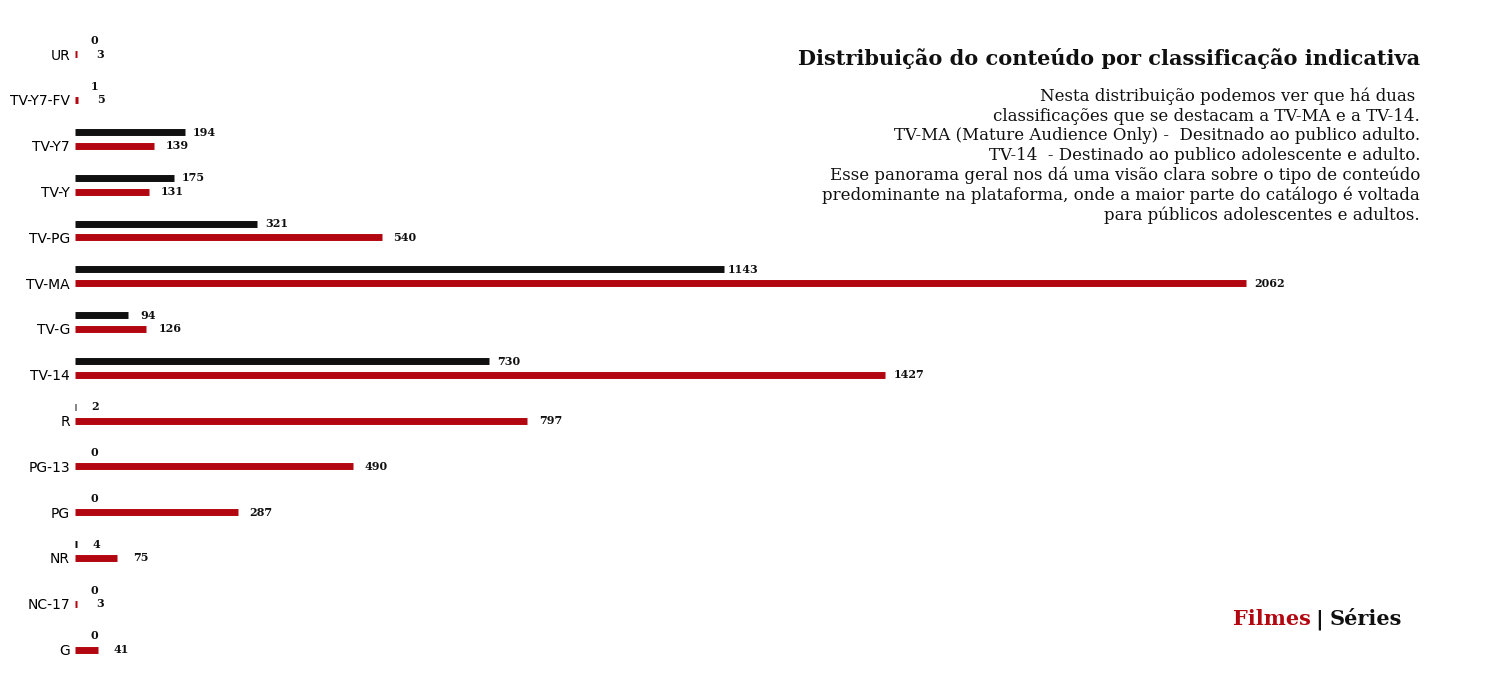

In [518]:
fig, ax = plt.subplots(figsize=(15, 7))

# Tiras horizontais
for i, rating in enumerate(class_ind.index):
    ax.hlines(y=i, xmin=0, xmax=class_ind['Movie'].iloc[i], color=net_dark_red, alpha=1, linewidth=5)
    ax.hlines(y=i + 0.3, xmin=0, xmax=class_ind['TV Show'].iloc[i], color=net_dark, alpha=1, linewidth=5)

ax.grid(False)
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both',length=0)
ax.set_yticks(range(len(class_ind.index)))
ax.set_yticklabels(class_ind.index)
ax.set_xlim(0, max(class_ind['Movie'].max(), class_ind['TV Show'].max()) * 1.2)
for s in ['left', 'right', 'top', 'bottom']:
    ax.spines[s].set_visible(False)

for i, r in enumerate(class_ind.index):
    ax.annotate(
        text=f'{int(class_ind['Movie'][i])}',
        xy=(int(class_ind['Movie'][i])+class_ind['Movie'].max()*0.02, i),
        va='center', ha='center', fontweight='bold', fontfamily='serif', fontsize=8, color=net_dark
    )

    ax.annotate(
        text=f'{int(class_ind['TV Show'][i])}',
        xy=((int(class_ind['TV Show'][i])+class_ind['TV Show'].max()*0.03, i+.3)),
        va='center', ha='center', fontweight='bold', fontfamily='serif', fontsize=8, color=net_dark
    )


fig.text(0.95, 0.9, 'Distribuição do conteúdo por classificação indicativa',
        ha='right', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark
    )

fig.text(0.95, 0.65, 
    '''
Nesta distribuição podemos ver que há duas 
classificações que se destacam: a TV-MA e a TV-14.
TV-MA (Mature Audience Only) -  Destinado ao público adulto.
TV-14  - Destinado ao público adolescente e adulto.
Esse panorama geral nos dá uma visão clara sobre o tipo de conteúdo
predominante na plataforma, onde a maior parte do catálogo é voltada
para públicos adolescentes e adultos.
''',
        ha='right', fontsize=12, fontweight='light', fontfamily='serif', color=net_dark
    )

fig.text(0.765 + 0.06,0.1,s='Filmes', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark_red)
fig.text(0.82 + 0.06,0.1,s='|', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark)
fig.text(0.83 + 0.06,0.1,s='Séries', fontsize=15, fontweight='bold', fontfamily='serif', color=net_dark)

plt.tight_layout()

### 6.1. Faixa etária
Podemos classificar por faixa etária e vializarmos melhor o público alvo da netflix.

In [809]:
faixas = pd.DataFrame(list(faixa_etaria.items()), columns=['rating', 'Faixa Etária'])

faixas_mesclado = pd.merge(left=df, right=faixas, how='left', on='rating')


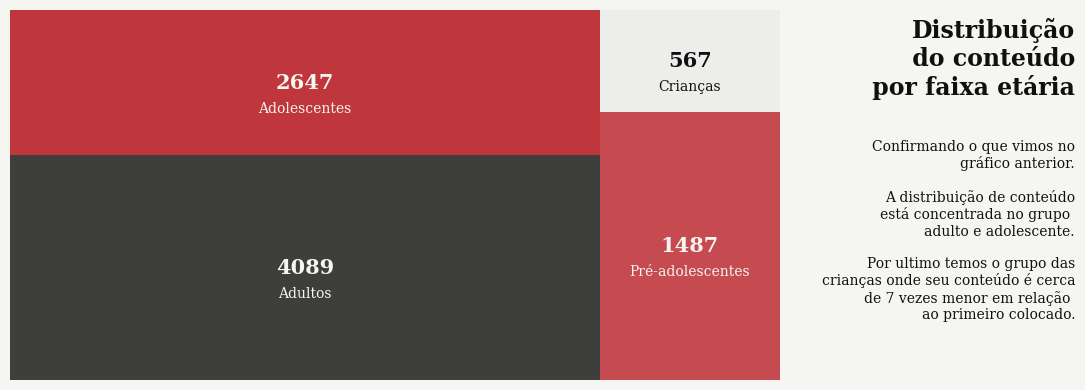

In [860]:
fig, ax = plt.subplots(1,1, figsize=(8,4), facecolor=net_light)
ax.set_facecolor(net_light)
sizes = faixas_mesclado['Faixa Etária'].value_counts()
labels = sizes.index

cores = [net_dark, net_dark_red, net_red, '#EBEBEA']

squarify.plot(sizes=sizes, alpha=0.8, color=cores, ax=ax)

for ret, label, cor in zip(ax.patches, labels, cores):
    x = ret.get_x() + ret.get_width() / 2
    y = ret.get_y() + ret.get_height() / 2

    r, g, b = mcolors.hex2color(cor)
    luminosity = 0.2126 * r + 0.7152 * g + 0.0722 * b

    if luminosity < 0.5:
        cor_label = net_light
    else:
        cor_label = net_dark

    ax.text(x, y, sizes[label], ha='center', va='center', fontsize=15, fontweight='bold', fontfamily='serif', color=cor_label)
    ax.text(x, y-7, f'{label}', ha='center', va='center', color=cor_label, fontsize=10, fontweight='light', fontfamily='serif')

plt.axis('off')



fig.text(1.35, 0.15, 
    '''
Confirmando o que vimos no
gráfico anterior.

A distribuição de conteúdo
está concentrada no grupo 
adulto e adolescente.

Por ultimo temos o grupo das
crianças onde seu conteúdo é cerca
de 7 vezes menor em relação 
ao primeiro colocado.
''',
        ha='right', fontsize=10, fontweight='light', fontfamily='serif', color=net_dark
    )

fig.text(1.35, 0.75, 'Distribuição\n do conteúdo\n por faixa etária',
        ha='right', fontsize=17, fontweight='bold', fontfamily='serif', color=net_dark
    )

plt.tight_layout()

<br><br>
<div id='temp'/>  

## 7. Tempo médio de Filmes e Séries
É interessante conhecer a média de duração dos filmes e séries na plataforma para identificar possíveis padrões no catálogo.

### 7.1. Filmes

A coluna de tempo de duração está configurada, no tipo filme, como string e em minutos.
Aqui foi criada uma faixa de duração em horas para agruparmos esses títulos.

In [531]:
# Criando um rótulo para a duração dos filmes

net_filmes = df[df['type'] == 'Movie']
net_filmes['duration'] = net_filmes['duration'].str.replace(' min', '').astype(int)

bins = [0, 60, 90, 120, 150, float('inf')]
labels_duracao = ['Até 1 hora', '1 a 1,5 horas', '1,5 a 2 horas', '2 a 2,5 horas', 'Mais de 2,5 horas']

net_filmes['Faixa de Duração'] = pd.cut(net_filmes['duration'], bins=bins, labels=labels_duracao, include_lowest=True)
net_filmes['primeira_categoria'] = net_filmes['listed_in'].apply(lambda x: x.split(",")[0])

net_filmes_sum = net_filmes.groupby(['Faixa de Duração']).size()

net_filmes_sum_cat = net_filmes.groupby(['primeira_categoria', 'Faixa de Duração'])['primeira_categoria'].value_counts()
net_filmes_sum_cat = net_filmes_sum_cat.unstack().reset_index().fillna(0)


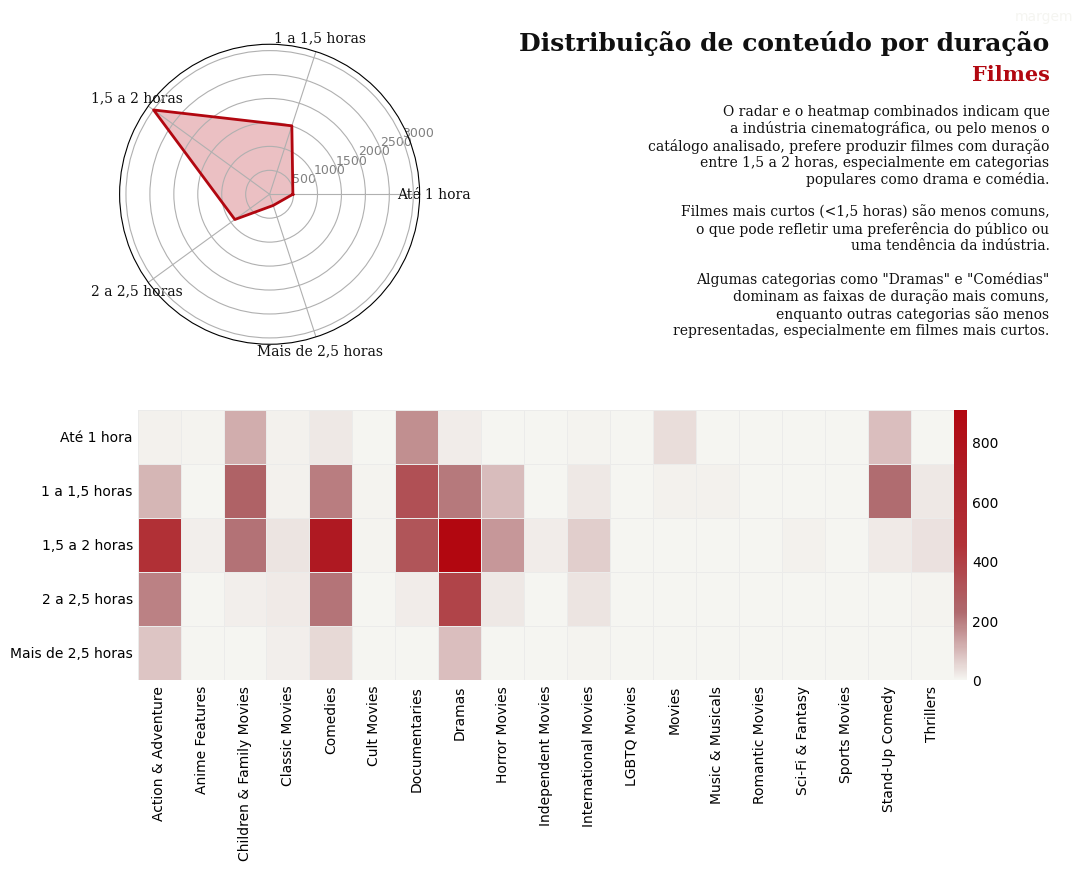

In [695]:
categorias = net_filmes_sum.index.tolist()
valores = net_filmes_sum.values.tolist()

# Calculo dos ângulos
# Gera ângulos igualmente espaçados de 0 2pi
angulos = np.linspace(
    0, # ângulo inicial
    2 * np.pi, # ângulo final
    len(categorias), # número de pontos igualmente distribuidos pelo círculo
    endpoint=False  # garante que o último ponto não seja incluido, pois é igual ao primeiro
).tolist()

# O mapa de radar precisa ser fechado para formar o polígono,
# então peciso adicionar o primeiro valor ao final da lista
valores += valores[:1]
angulos += angulos[:1]

fig = plt.figure(figsize=(12, 6))

ax = fig.add_axes([-0.05, 0.06, 0.4, 0.5], polar=True)

ax.fill(angulos, valores, color=net_dark_red, alpha=0.25)
ax.plot(angulos, valores, color=net_dark_red, linewidth=2)

ax.set_xticks(angulos[:-1])
ax.tick_params(axis='y', labelsize=9, labelcolor='grey')
ax.set_xticklabels(categorias, fontsize=10, fontfamily='serif', color=net_dark)

# Grafico 2 - Mapa calor
ax2 = fig.add_axes([0.04, -0.5, 0.8, .45])

cores = [net_light, '#AF6A6E', '#B13238', '#AE1F27', '#B20710']
cmap = LinearSegmentedColormap.from_list("custom_cmap", cores)

net_filmes_sum_cat_ = net_filmes_sum_cat
net_filmes_sum_cat_ = net_filmes_sum_cat_.set_index('primeira_categoria')
net_filmes_sum_cat_transposed = net_filmes_sum_cat_.T

sns.heatmap(
    net_filmes_sum_cat_transposed,
    cbar=True, cbar_kws={"shrink": 1, "orientation": "vertical", "pad": 0.0},
    cmap=cmap, annot=False,
    linewidths=.5, linecolor='#EBEBEA',
    ax=ax2)

ax.yaxis.set_tick_params(pad=2)
ax2.set_ylabel('')
ax2.set_xlabel('')

for ax in fig.axes:
    ax.tick_params(axis='both', which='both',length=0)

fig.text(
  x=0.8, y = 0.55,
  s= 'Distribuição de conteúdo por duração',
  ha='right',
  fontsize=18,
  color=net_dark,
  fontfamily='serif',
  fontweight='bold'
)

fig.text(
  x=0.8, y = 0.5,
  s= 'Filmes',
  ha='right',
  fontsize=15,
  color=net_dark_red,
  fontfamily='serif',
  fontweight='bold'
)

fig.text(
  x=0.8, y = 0.05,
  s= '''
O radar e o heatmap combinados indicam que
a indústria cinematográfica, ou pelo menos o
catálogo analisado, prefere produzir filmes com duração
entre 1,5 e 2 horas, especialmente em categorias
populares como drama e comédia.

Filmes mais curtos (<1,5 horas) são menos comuns,
o que pode refletir uma preferência do público ou
uma tendência da indústria.

Algumas categorias como "Dramas" e "Comédias"
dominam as faixas de duração mais comuns,
enquanto outras categorias são menos
representadas, especialmente em filmes mais curtos.
''',
  ha='right',
  fontsize=10,
  color=net_dark,
  fontfamily='serif',
  fontweight='light'
)

fig.text(x=0.82, y = 0.6,s='margem', color=net_light, ha='right',)


plt.tight_layout()


### 7.2. Séries

De forma análoga aos filmes, criaremos uma faixa de distribuição por temporadas e agruparemos esses valores.

In [733]:
net_series= df[df['type'] == 'TV Show']
net_series['duration'] = net_series['duration'].str.replace(' Season', '')
net_series['duration'] = net_series['duration'].str.replace(' Seasons', '')
net_series['duration'] = net_series['duration'].str.replace('s', '').astype(int)

bins_temporadas = [1, 2, 3, 4, 6, float('inf')]
labels_temporadas = ['1 Temporada', '2 Temporadas', '3 Temporadas', '4 Temporadas', '5 ou mais\n Temporadas']
net_series['Faixa de Temporadas'] = pd.cut(net_series['duration'], bins=bins_temporadas, labels=labels_temporadas, right=False)

net_series['primeira_categoria'] = net_series['listed_in'].apply(lambda x: x.split(",")[0])

net_series_sum = net_series.groupby(['Faixa de Temporadas']).size()

net_series_sum_cat = net_series.groupby(['primeira_categoria', 'Faixa de Temporadas'])['primeira_categoria'].value_counts()
net_series_sum_cat = net_series_sum_cat.unstack().reset_index().fillna(0)


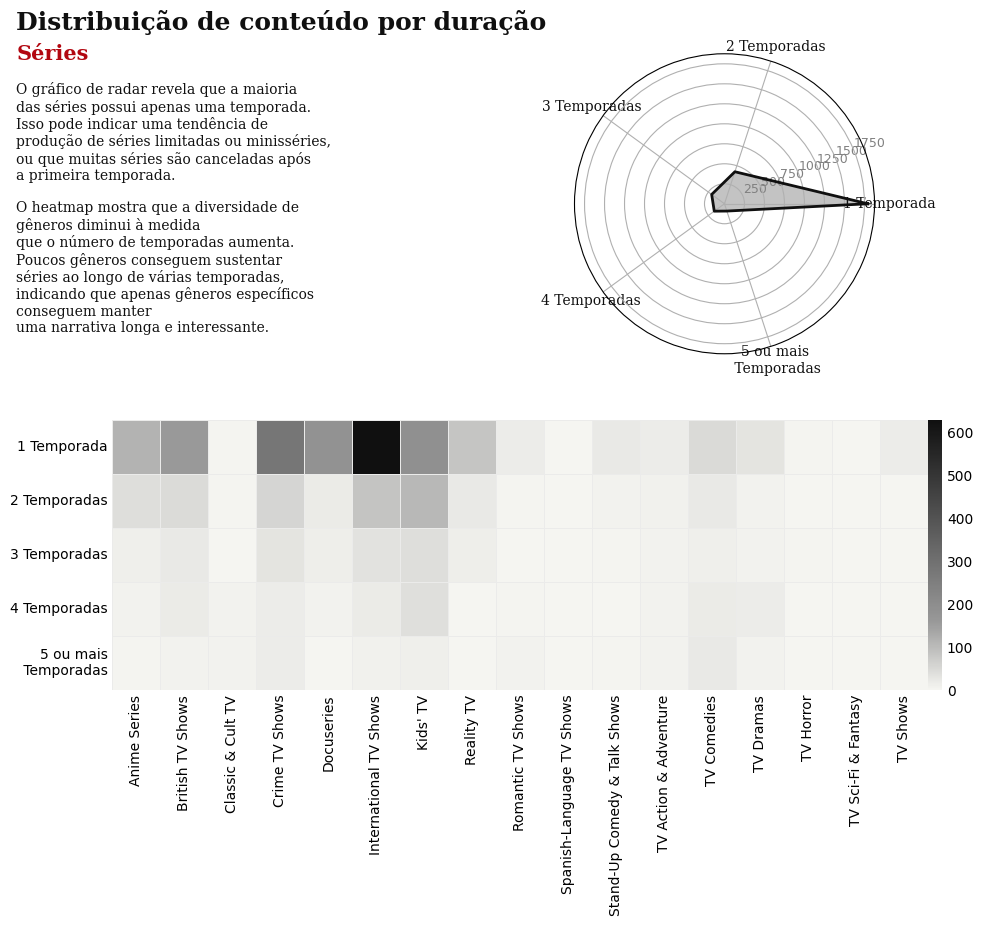

In [758]:
categorias = net_series_sum.index.tolist()
valores = net_series_sum.values.tolist()

angulos = np.linspace(
    0, 
    2 * np.pi, 
    len(categorias), 
    endpoint=False  
).tolist()

valores += valores[:1]
angulos += angulos[:1]

fig = plt.figure(figsize=(12, 6))

ax = fig.add_axes([0.35, 0.06, 0.4, 0.5], polar=True)

ax.fill(angulos, valores, color=net_dark, alpha=0.25)
ax.plot(angulos, valores, color=net_dark, linewidth=2)

ax.set_xticks(angulos[:-1])
ax.tick_params(axis='y', labelsize=9, labelcolor='grey')
ax.set_xticklabels(categorias, fontsize=10, fontfamily='serif', color=net_dark)


# Grafico 2 - Mapa calor
ax2 = fig.add_axes([0.04, -0.5, 0.8, .45])

cores = [net_light, '#999999', '#6C6C6C', '#3E3E3E', net_dark]
cmap = LinearSegmentedColormap.from_list("custom_cmap", cores)

net_series_sum_cat_ = net_series_sum_cat
net_series_sum_cat_ = net_series_sum_cat_.set_index('primeira_categoria')
net_series_sum_cat_transposed = net_series_sum_cat_.T

sns.heatmap(
    net_series_sum_cat_transposed,
    cbar=True, cbar_kws={"shrink": 1, "orientation": "vertical", "pad": 0.0},
    cmap=cmap, annot=False,
    linewidths=.5, linecolor='#EBEBEA',
    ax=ax2)

ax.yaxis.set_tick_params(pad=2)
ax2.set_ylabel('')
ax2.set_xlabel('')

for ax in fig.axes:
    ax.tick_params(axis='both', which='both', length=0)


fig.text(
  x=-0.04, y = 0.6,
  s= 'Distribuição de conteúdo por duração',
  ha='left',
  fontsize=18,
  color=net_dark,
  fontfamily='serif',
  fontweight='bold'
)

fig.text(
  x=-0.04, y = 0.55,
  s= 'Séries',
  ha='left',
  fontsize=15,
  color=net_dark_red,
  fontfamily='serif',
  fontweight='bold'
)

fig.text(
  x=-0.04, y = .07,
  s= '''
O gráfico de radar revela que a maioria 
das séries possui apenas uma temporada.
Isso pode indicar uma tendência de
produção de séries limitadas ou minisséries,
ou que muitas séries são canceladas após 
a primeira temporada.

O heatmap mostra que a diversidade de 
gêneros diminui à medida 
que o número de temporadas aumenta. 
Poucos gêneros conseguem sustentar 
séries ao longo de várias temporadas,
indicando que apenas gêneros específicos 
conseguem manter
uma narrativa longa e interessante.
''',
  ha='left',
  fontsize=10,
  color=net_dark,
  fontfamily='serif',
  fontweight='light'
)

plt.tight_layout()


<br><br>
<div id='conc'/> 

## 8. Conclusão
Aqui apresento um resumo dos dados obtidos acima.

### 8.1. Obtendo os dados para a conclusão

In [780]:
filmes_série = f"Os dados mostram que {int(perc['Movie'] * 100)}% do conteúdo são filmes"

med_duracao_film = f"A duração média dos filmes é de {int(net_filmes['duration'].mean())} minutos" 
med_duracao_serie = f"A duração média dos filmes é de {int(net_series['duration'].mean())} temporada" 
diretor = f'''
{str(diretores_cont.reset_index().iloc[0]['diretor_primeiro'])}
com {int(diretores_cont.reset_index().iloc[0]['Movie'])} filmes
na plataforma.
'''

df_resumo = df
df_resumo['primeira_categoria'] = df_resumo['listed_in'].apply(lambda x: x.split(",")[0])
def_resumo_cat = df_resumo.groupby(['primeira_categoria']).size().sort_values(ascending=False)

genero = f"Em primeiro lugar {str(def_resumo_cat.index[0])} se destaca com `{int(def_resumo_cat[0])} títulos"

str(def_resumo_cat.index[0])
int(def_resumo_cat[0])

top_10_paises = top_10_paises.sort_values(by='total', ascending=False)

pais = f"{str(top_10_paises.iloc[0]['primeiro_pais'])} com {int(top_10_paises.iloc[0]['total'])} títulos"

'A duração média dos filmes é de 1 temporadas'

### 8.2 Apresentação - Visão geral dos dados levantados

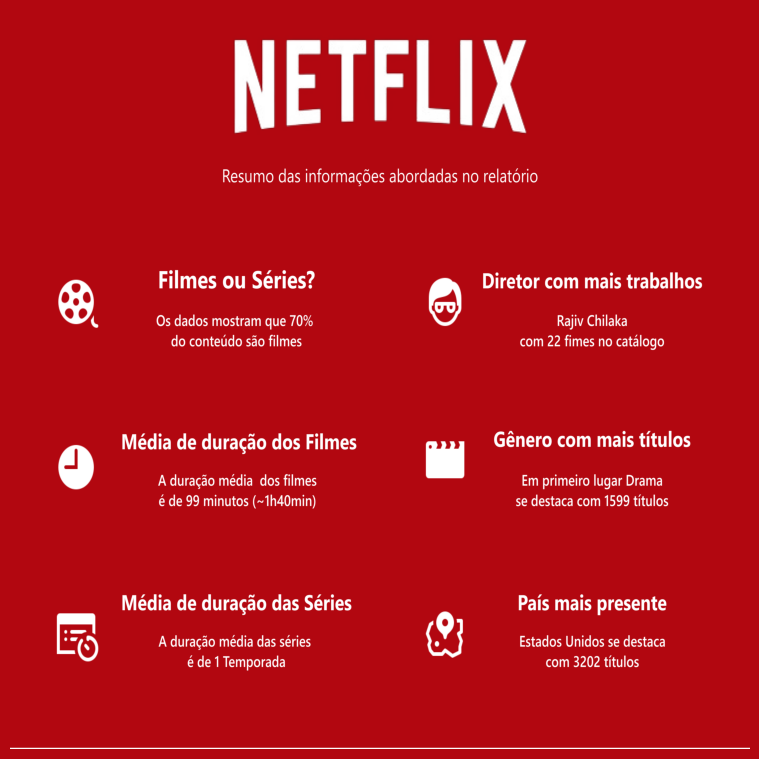

In [808]:
img = mpimg.imread(os.path.join(input_path, 'Resumo.png'))

height, width, _ = img.shape
ratio = width / height

fig, ax = plt.subplots(figsize=(12, 12/ratio), facecolor=net_dark_red)
ax.imshow(img, extent=[-1, 1, -1, 1])
ax.axis('off')  # Desativa os eixos para focar apenas na imagem

plt.show()


Espero que tenha apreciado a apresentação. Fique à vontade para compartilhar qualquer crítica construtiva; ela será muito bem-vinda.

Gostaria também de expressar minha gratidão pelos inúmeros trabalhos inspiradores na plataforma Kaggle, Em particular, agradeço ao [Josh](https://www.kaggle.com/joshuaswords) pela influência significativa na minha abordagem de visualização de dados e storytelling.

### Contatos:

- williamsilva14@hotmail.com
- [LinkedIn](https://www.linkedin.com/in/william-oliveira-641910169/)